# **Presented by: Ali Basit**
**Oasis InfoByte Task Number two UnEmployment Analysis**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
!unzip /content/Task_Data.zip

Archive:  /content/Task_Data.zip
  inflating: Unemployment in India.csv  
  inflating: Unemployment_Rate_upto_11_2020.csv  


In [44]:
df_1 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df_1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [45]:
df_2 = pd.read_csv("/content/Unemployment in India.csv")
df_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [46]:
df_1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [47]:
df_2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [48]:
df=pd.concat([df_1, df_2], ignore_index=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Area
0,Andhra Pradesh,31-01-2020,M,5.48,16635535.0,41.02,South,15.9129,79.74,NaN
1,Andhra Pradesh,29-02-2020,M,5.83,16545652.0,40.90,South,15.9129,79.74,NaN
2,Andhra Pradesh,31-03-2020,M,5.79,15881197.0,39.18,South,15.9129,79.74,NaN
3,Andhra Pradesh,30-04-2020,M,20.51,11336911.0,33.10,South,15.9129,79.74,NaN
4,Andhra Pradesh,31-05-2020,M,17.43,12988845.0,36.46,South,15.9129,79.74,NaN
...,...,...,...,...,...,...,...,...,...,...
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.isnull().sum()

Region                                       28
 Date                                        28
 Frequency                                   28
 Estimated Unemployment Rate (%)             28
 Estimated Employed                          28
 Estimated Labour Participation Rate (%)     28
Region.1                                    768
longitude                                   768
latitude                                    768
Area                                        295
dtype: int64

In [50]:
df_cleaned = df.dropna()

In [51]:
df_cleaned = df.fillna(df.mean())


In [52]:
df_cleaned = df.apply(lambda x: x.fillna(x.mode()[0]))


In [53]:
df_cleaned

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Area
0,Andhra Pradesh,31-01-2020,M,5.48,16635535.0,41.02,South,15.9129,79.7400,Urban
1,Andhra Pradesh,29-02-2020,M,5.83,16545652.0,40.90,South,15.9129,79.7400,Urban
2,Andhra Pradesh,31-03-2020,M,5.79,15881197.0,39.18,South,15.9129,79.7400,Urban
3,Andhra Pradesh,30-04-2020,M,20.51,11336911.0,33.10,South,15.9129,79.7400,Urban
4,Andhra Pradesh,31-05-2020,M,17.43,12988845.0,36.46,South,15.9129,79.7400,Urban
...,...,...,...,...,...,...,...,...,...,...
1030,Andhra Pradesh,29-02-2020,Monthly,0.00,9828023.0,42.82,North,10.8505,75.7139,Urban
1031,Andhra Pradesh,29-02-2020,Monthly,0.00,9828023.0,42.82,North,10.8505,75.7139,Urban
1032,Andhra Pradesh,29-02-2020,Monthly,0.00,9828023.0,42.82,North,10.8505,75.7139,Urban
1033,Andhra Pradesh,29-02-2020,Monthly,0.00,9828023.0,42.82,North,10.8505,75.7139,Urban


In [54]:
df_cleaned.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Area'],
      dtype='object')

In [55]:
df_cleaned.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,1035.000000,1.035000e+03,1035.000000,1035.000000,1035.00000
mean,11.584870,9.018712e+06,42.390560,13.939844,76.95694
std,10.768007,1.006958e+07,7.939143,6.131462,3.63287
min,0.000000,4.942000e+04,13.330000,10.850500,71.19240
25%,4.455000,1.735944e+06,37.955000,10.850500,75.71390
50%,8.340000,5.718337e+06,41.090000,10.850500,75.71390
75%,15.825000,1.258240e+07,45.155000,10.850500,75.71390
max,76.740000,5.943376e+07,72.570000,33.778200,92.93760


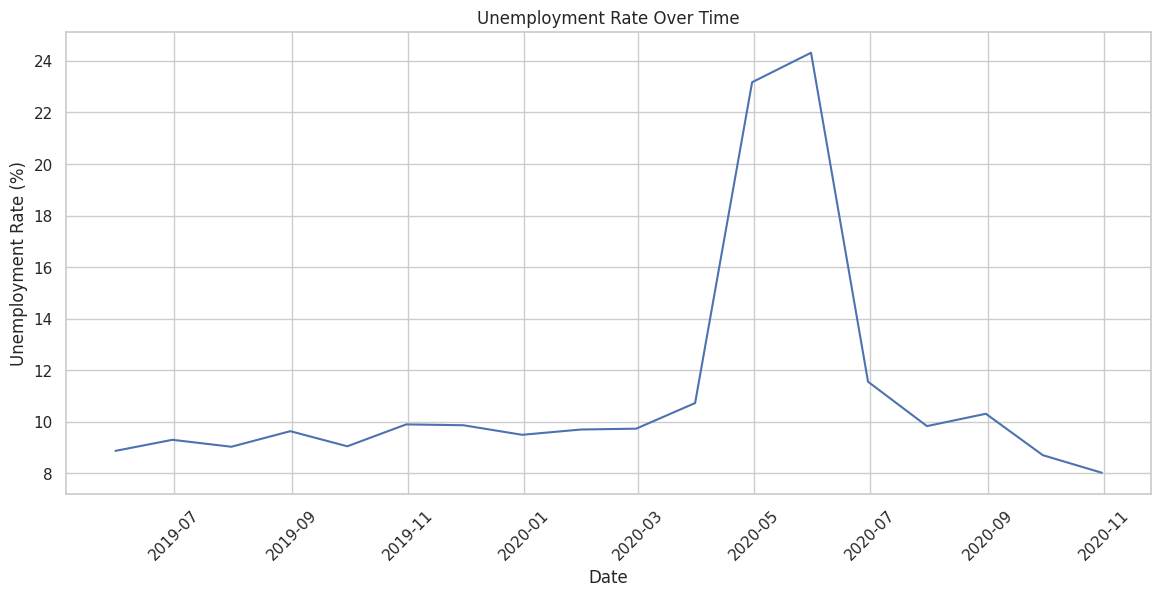

In [61]:
# Convert 'Date' column to datetime format
df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index
df.set_index(' Date', inplace=True)

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Explore the distribution of the unemployment rate over time using a line chart
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y=' Estimated Unemployment Rate (%)', data=df_cleaned, ci=None)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

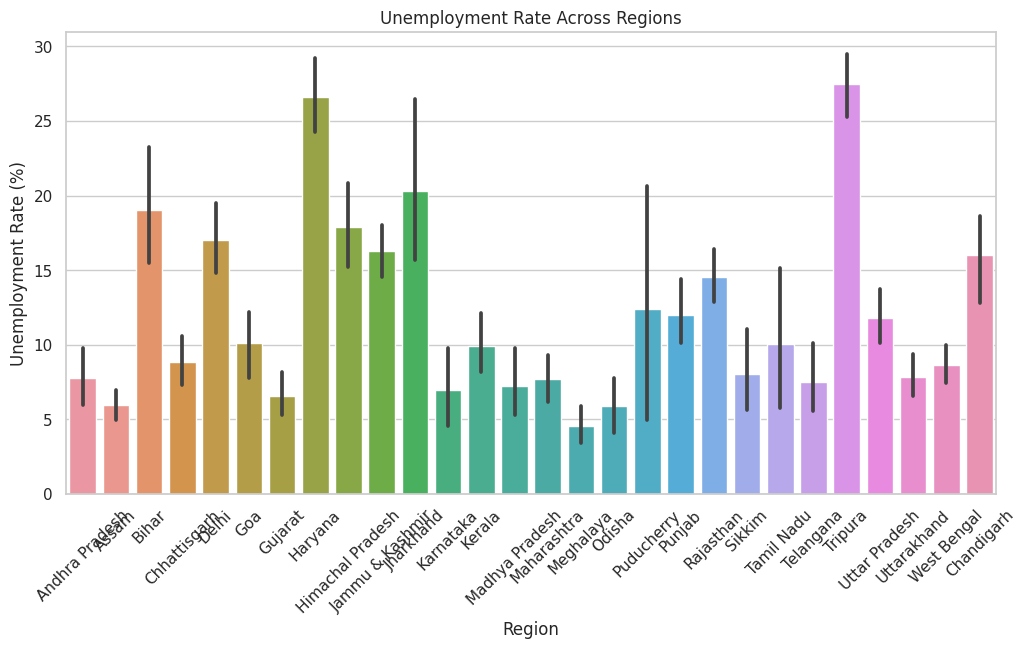

In [63]:
# Explore the distribution of the unemployment rate across regions using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Across Regions')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

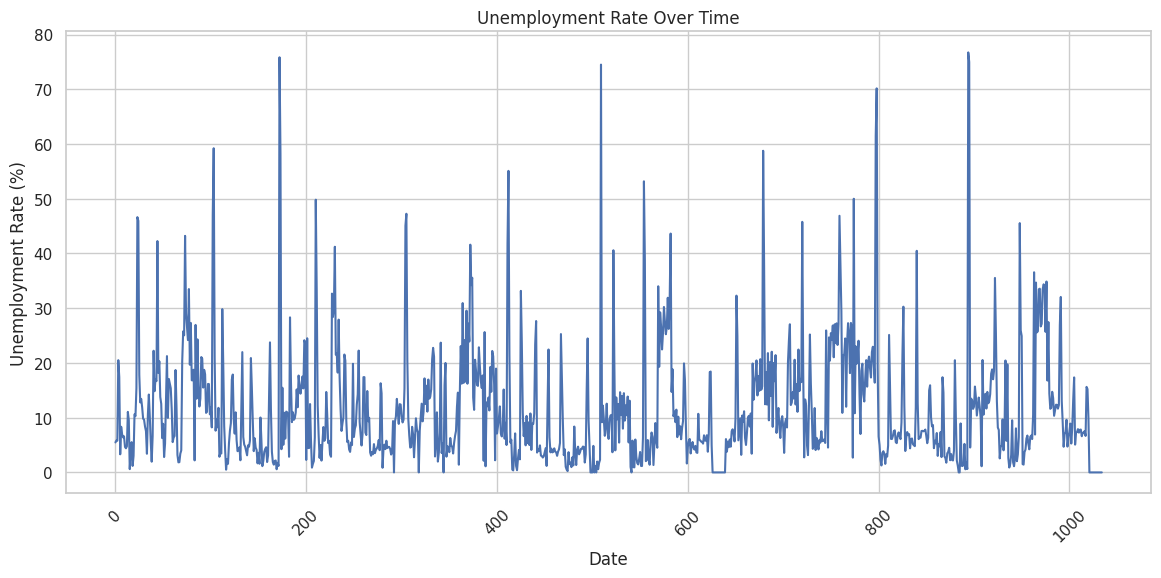

In [65]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a line chart for exploring the unemployment rate over time
plt.figure(figsize=(14, 6))
sns.lineplot(x=df_cleaned.index, y=' Estimated Unemployment Rate (%)', data=df_cleaned, ci=None)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

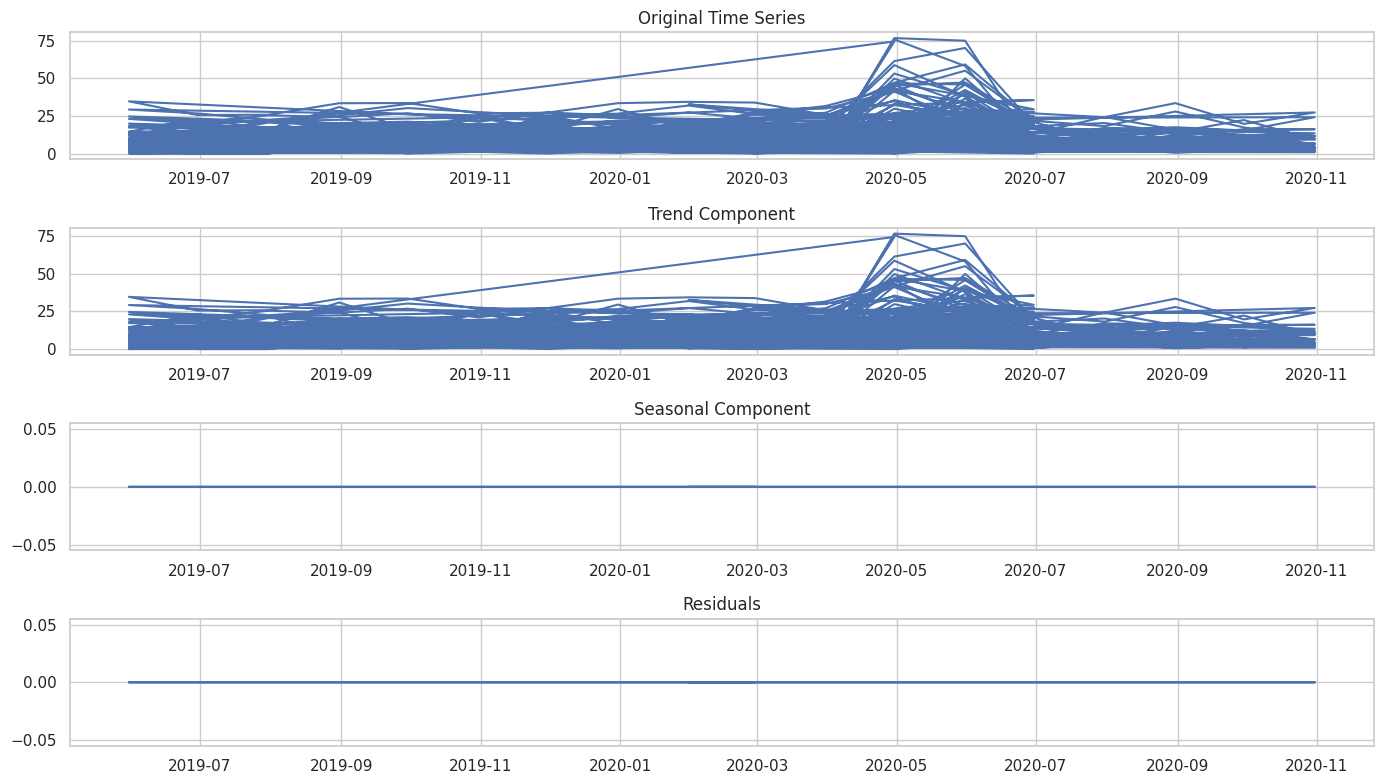

In [70]:
# Convert 'Date' column to datetime format and set it as the index
df_cleaned['Date'] = pd.to_datetime(df_cleaned[' Date'], format='%d-%m-%Y')
df_cleaned.set_index(' Date', inplace=True)

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df_cleaned[' Estimated Unemployment Rate (%)'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original time series, trend, and seasonal components
plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df_cleaned[' Estimated Unemployment Rate (%)'], label='Original Time Series')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.title('Residuals')

plt.tight_layout()
plt.show()

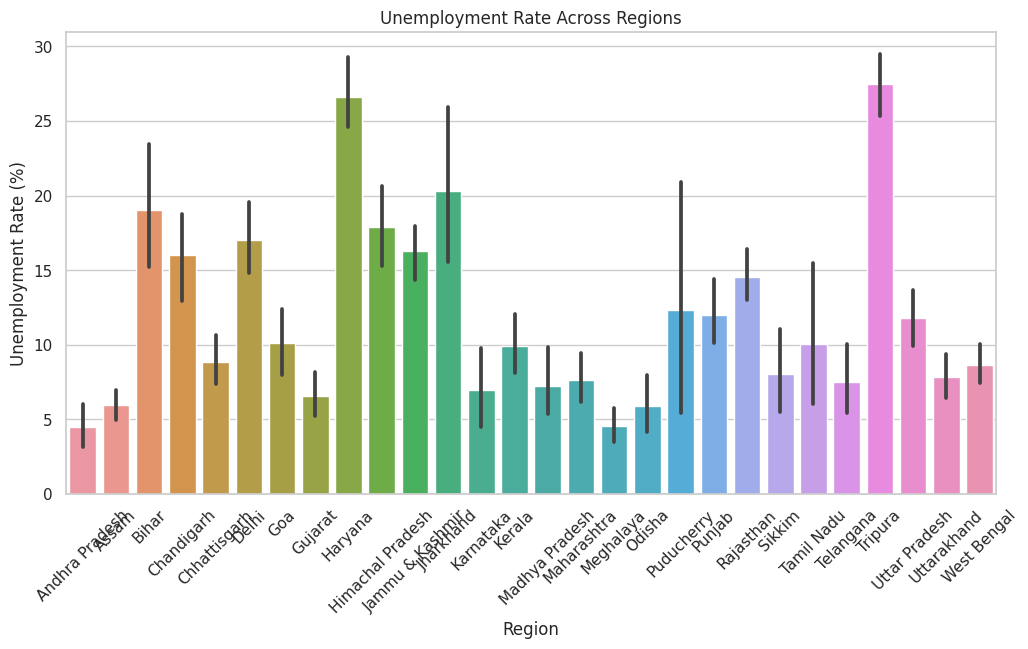

In [71]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart to visualize the unemployment rate across regions
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df_cleaned)
plt.title('Unemployment Rate Across Regions')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()



In [72]:
# Identify regions with the most significant changes in unemployment rate
region_changes = df_cleaned.groupby('Region')[' Estimated Unemployment Rate (%)'].std().sort_values(ascending=False)
print("Regions with the Most Significant Changes in Unemployment Rate:")
print(region_changes)

Regions with the Most Significant Changes in Unemployment Rate:
Region
Puducherry          24.683425
Jharkhand           16.880753
Tamil Nadu          14.778530
Bihar               12.908843
Himachal Pradesh     8.935752
Karnataka            8.399727
Telangana            7.515918
Delhi                7.497190
Haryana              7.480611
Madhya Pradesh       7.261454
Sikkim               7.056073
Tripura              6.868256
Punjab               6.760167
Goa                  6.705195
Kerala               6.343651
Andhra Pradesh       6.252290
Odisha               5.991226
Uttar Pradesh        5.916170
Chandigarh           5.508220
Rajasthan            5.432049
Chhattisgarh         5.312996
Maharashtra          5.171459
Jammu & Kashmir      4.966547
Gujarat              4.774619
Uttarakhand          4.599255
West Bengal          4.128380
Meghalaya            3.754970
Assam                3.123227
Name:  Estimated Unemployment Rate (%), dtype: float64


Time Range of the Dataset:
2019-05-31 00:00:00 to 2020-10-31 00:00:00


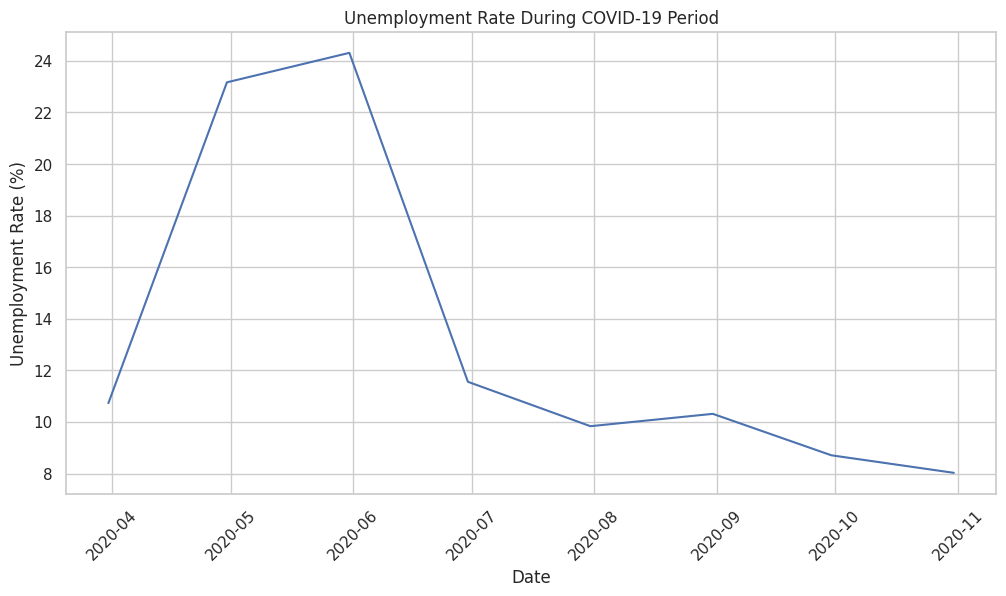

In [84]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')

# Explore the time range of the dataset
print("Time Range of the Dataset:")
print(df_cleaned['Date'].min(), "to", df_cleaned['Date'].max())

# Identify the COVID-19 outbreak period (replace with your actual dates)
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-01-01')

# Filter data for the COVID-19 outbreak period
df_covid_period = df_cleaned[(df_cleaned['Date'] >= covid_start_date) & (df_cleaned['Date'] < covid_end_date)]

# Visualize unemployment rate during the COVID-19 period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df_covid_period, ci=None)
plt.title('Unemployment Rate During COVID-19 Period')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

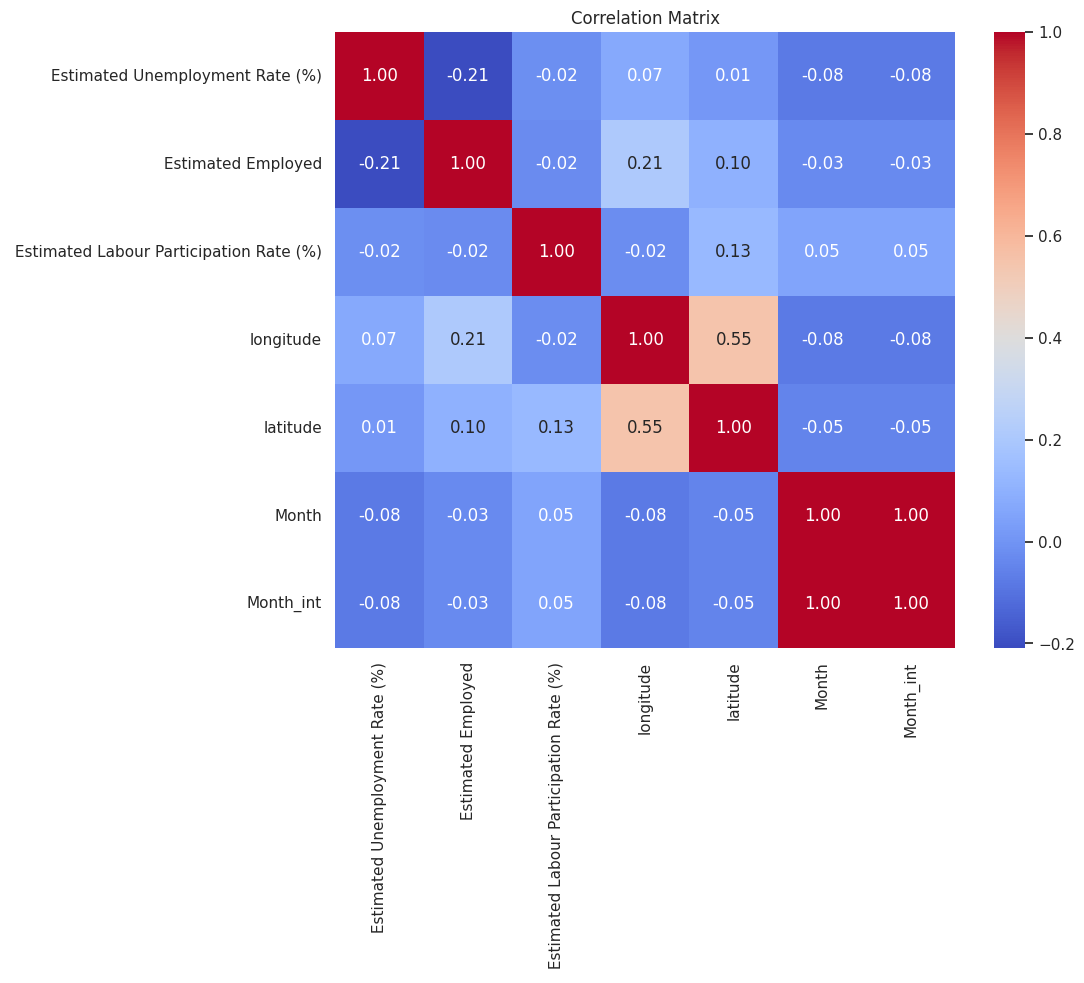

In [85]:
# Correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Select features and target variable
X = df_cleaned[[' Estimated Labour Participation Rate (%)', ' Estimated Employed']]
y = df_cleaned[' Estimated Unemployment Rate (%)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [89]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 119.98
R-squared: 0.03
